In [2]:
import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('employee_wellness_dataset.csv')


In [3]:
df.shape

(1048, 28)

In [4]:
df.isnull().sum()


S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          4
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

In [5]:
from sklearn.impute import KNNImputer

In [6]:
df.describe()

,S.No,Age
count,1048.000000,1.048000e+03
mean,524.500000,9.541988e+07
std,302.675844,3.089010e+09
min,1.000000,-1.726000e+03
25%,262.750000,2.700000e+01
50%,524.500000,3.100000e+01
75%,786.250000,3.600000e+01
max,1048.000000,1.000000e+11


In [7]:
import numpy as np

In [ ]:
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1

   
    lower_bound = 18
    upper_bound = 60
    
    return lower_bound, upper_bound

In [10]:
df.describe()

,S.No,Age
count,1048.000000,1048.000000
mean,524.500000,31.914122
std,302.675844,7.318271
min,1.000000,18.000000
25%,262.750000,27.000000
50%,524.500000,31.000000
75%,786.250000,36.000000
max,1048.000000,60.000000


In [11]:
df['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0       37
1       44
2       32
3       31
4       31
        ..
1043    26
1044    29
1045    26
1046    33
1047    28
Name: Age, Length: 1048, dtype: int64>

In [13]:
float_count = df['Age'].apply(lambda x: isinstance(x, float)).sum()
print(float_count)

0


In [14]:
gender_map = {
    'M': 'Male', 'm': 'Male', 'male': 'Male', 'Male': 'Male', 'Make': 'Male', 'Mail': 'Male', 'Maile': 'Male',
    'Mal': 'Male', 'Malr': 'Male', 'msle': 'Male', 'Man': 'Male', 'Cis Male': 'Male', 'cis male': 'Male',
    'Male (CIS)': 'Male', 'Male-ish': 'Male', 'male leaning androgynous': 'Male', 'something kinda male?': 'Male',
    'F': 'Female', 'f': 'Female', 'female': 'Female', 'Female': 'Female', 'Femake': 'Female',
    'Woman': 'Female', 'woman': 'Female', 'cis-female/femme': 'Female', 'cis female': 'Female',
    'Cis Female': 'Female', 'Female (cis)': 'Female', 'Trans woman': 'Female', 'Trans-female': 'Female'
}
df.loc[:, 'Gender'] = df['Gender'].replace(gender_map)
df = df[df['Gender'].isin(['Male', 'Female'])]
df

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,Male,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1044,8/29/2014 11:20,26,Male,United States,WA,No,No,Yes,Sometimes,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
1044,1045,8/29/2014 11:22,29,Female,United Kingdom,NaN,No,No,Yes,Often,...,Don't know,Maybe,No,Some of them,No,No,Yes,No,Yes,NaN
1045,1046,8/29/2014 11:23,26,Female,Canada,NaN,No,Yes,Yes,Sometimes,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
1046,1047,8/29/2014 11:24,33,Male,Italy,NaN,No,Yes,Yes,Sometimes,...,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No,I suffered of panic attacks and agoraphobia fo...


In [16]:
df['Gender'].value_counts()

Gender
Male      827
Female    202
Name: count, dtype: int64

In [17]:
df['treatment'].value_counts().unique()

array([533, 496])

In [18]:
df.drop(columns=['comments','no_employees', 'state'], inplace=True, errors='ignore')
df

C:\Users\prath\AppData\Local\Temp\ipykernel_2912\4189631238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['comments','no_employees', 'state'], inplace=True, errors='ignore')


,S.No,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,8/27/2014 11:29,37,Female,United States,NaN,No,Yes,Often,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2,8/27/2014 11:29,44,Male,United States,NaN,No,No,Rarely,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,3,8/27/2014 11:29,32,Male,Canada,NaN,No,No,Rarely,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,Yes,Yes,Often,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,5,8/27/2014 11:30,31,Male,United States,NaN,No,No,Never,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1044,8/29/2014 11:20,26,Male,United States,No,No,Yes,Sometimes,No,...,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
1044,1045,8/29/2014 11:22,29,Female,United Kingdom,No,No,Yes,Often,No,...,Don't know,Don't know,Maybe,No,Some of them,No,No,Yes,No,Yes
1045,1046,8/29/2014 11:23,26,Female,Canada,No,Yes,Yes,Sometimes,No,...,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
1046,1047,8/29/2014 11:24,33,Male,Italy,No,Yes,Yes,Sometimes,No,...,Don't know,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No


In [20]:
age_counts = df['Age'].value_counts()
describe = df['Age'].describe()

In [21]:
describe

count    1029.000000
mean       31.883382
std         7.244615
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        60.000000
Name: Age, dtype: float64

In [22]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
Male      827
Female    202
Name: count, dtype: int64


In [23]:
country_counts = df['Country'].value_counts()
print(country_counts)

Country
United States             634
United Kingdom            149
Canada                     63
Germany                    35
Australia                  18
Netherlands                18
Ireland                    13
France                     11
India                       8
Italy                       6
Switzerland                 6
Sweden                      6
New Zealand                 6
Poland                      5
Brazil                      5
South Africa                4
Belgium                     4
Israel                      4
Mexico                      3
Bulgaria                    3
Russia                      3
Austria                     3
Portugal                    2
Finland                     2
Denmark                     2
Singapore                   2
Slovenia                    1
Costa Rica                  1
Latvia                      1
Colombia                    1
Spain                       1
Romania                     1
Bosnia and Herzegovina      1
Ur

In [24]:
self_employed_counts = df['self_employed'].value_counts(dropna=False)
print(self_employed_counts)

self_employed
No     891
Yes    120
NaN     18
Name: count, dtype: int64


In [25]:
df.drop(['self_employed'], axis=1, inplace = True)

C:\Users\prath\AppData\Local\Temp\ipykernel_2912\1081393844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['self_employed'], axis=1, inplace = True)


In [26]:
df

,S.No,Timestamp,Age,Gender,Country,family_history,treatment,work_interfere,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,8/27/2014 11:29,37,Female,United States,No,Yes,Often,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2,8/27/2014 11:29,44,Male,United States,No,No,Rarely,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,3,8/27/2014 11:29,32,Male,Canada,No,No,Rarely,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,4,8/27/2014 11:29,31,Male,United Kingdom,Yes,Yes,Often,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,5,8/27/2014 11:30,31,Male,United States,No,No,Never,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1044,8/29/2014 11:20,26,Male,United States,No,Yes,Sometimes,No,Yes,...,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
1044,1045,8/29/2014 11:22,29,Female,United Kingdom,No,Yes,Often,No,No,...,Don't know,Don't know,Maybe,No,Some of them,No,No,Yes,No,Yes
1045,1046,8/29/2014 11:23,26,Female,Canada,Yes,Yes,Sometimes,No,Yes,...,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
1046,1047,8/29/2014 11:24,33,Male,Italy,Yes,Yes,Sometimes,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No


In [27]:
family_history_counts = df['family_history'].value_counts()
print(family_history_counts)

family_history
No     637
Yes    392
Name: count, dtype: int64


family_history
No     637
Yes    392
Name: count, dtype: int64


In [29]:
treatment_counts = df['treatment'].value_counts()
print(treatment_counts)

treatment
No     533
Yes    496
Name: count, dtype: int64


In [46]:
work_interfere_counts = df['work_interfere'].value_counts()
print(work_interfere_counts)

work_interfere
Sometimes        377
Not Specified    235
Never            176
Rarely           140
Often            101
Name: count, dtype: int64


In [33]:
df.count()

S.No                         1029
Timestamp                    1029
Age                          1029
Gender                       1029
Country                      1029
family_history               1029
treatment                    1029
work_interfere                794
remote_work                  1029
tech_company                 1029
benefits                     1016
care_options                 1029
wellness_program             1025
seek_help                    1029
anonymity                    1029
leave                        1025
mental_health_consequence    1029
phys_health_consequence      1029
coworkers                    1029
supervisor                   1029
mental_health_interview      1029
phys_health_interview        1029
mental_vs_physical           1029
obs_consequence              1029
dtype: int64

In [45]:
df['work_interfere'].replace('Yes', 'Not Specified', inplace=True)


C:\Users\prath\AppData\Local\Temp\ipykernel_2912\2447832627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_interfere'].replace('Yes', 'Not Specified', inplace=True)


In [47]:
null_benefits_count = df['benefits'].isnull().sum()
print(null_benefits_count)


0


In [51]:
wellness_program_counts = df['wellness_program'].value_counts
print(wellness_program_counts)


<bound method IndexOpsMixin.value_counts of 0               No
1       Don't know
2               No
3               No
4       Don't know
           ...    
1043            No
1044            No
1045            No
1046            No
1047            No
Name: wellness_program, Length: 1029, dtype: object>


In [54]:
leave_counts = df['leave'].value_counts(dropna=False)
print(leave_counts)


leave
Don't know            459
Somewhat easy         215
Very easy             173
Somewhat difficult    103
Very difficult         79
Name: count, dtype: int64


In [55]:
df.describe()

,S.No,Age
count,1029.000000,1029.000000
mean,523.532556,31.883382
std,303.439287,7.244615
min,1.000000,18.000000
25%,259.000000,27.000000
50%,524.000000,31.000000
75%,786.000000,36.000000
max,1048.000000,60.000000


In [56]:
df.count()

S.No                         1029
Timestamp                    1029
Age                          1029
Gender                       1029
Country                      1029
family_history               1029
treatment                    1029
work_interfere               1029
remote_work                  1029
tech_company                 1029
benefits                     1029
care_options                 1029
wellness_program             1029
seek_help                    1029
anonymity                    1029
leave                        1029
mental_health_consequence    1029
phys_health_consequence      1029
coworkers                    1029
supervisor                   1029
mental_health_interview      1029
phys_health_interview        1029
mental_vs_physical           1029
obs_consequence              1029
dtype: int64

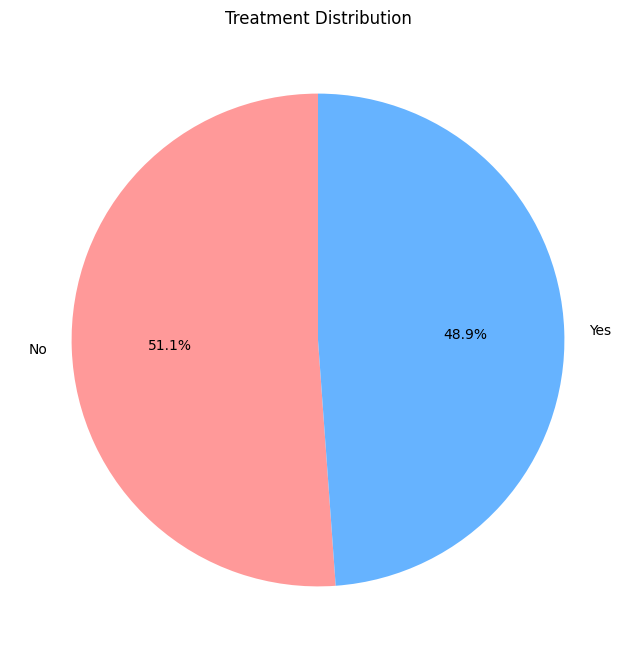

In [3]:
import matplotlib.pyplot as plt

# Count the values for the 'treatment' column
treatment_counts = df['treatment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
treatment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Treatment Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

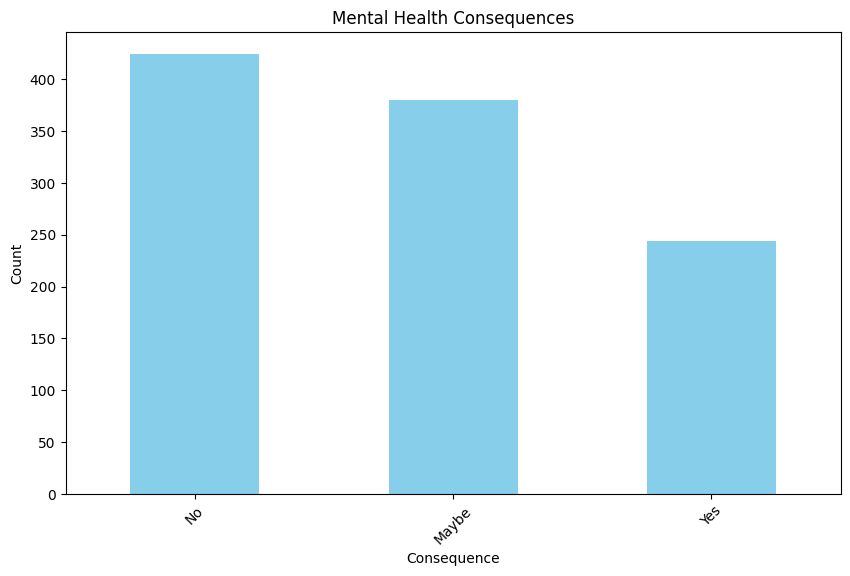

In [4]:
import matplotlib.pyplot as plt

# Count the values for the 'mental_health_consequence' column
mental_health_consequence_counts = df['mental_health_consequence'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
mental_health_consequence_counts.plot(kind='bar', color='skyblue')
plt.title('Mental Health Consequences')
plt.xlabel('Consequence')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [7]:
df.to_excel('updates_dataset_employee.xlsx', index=False)

In [9]:
df.count()

S.No                         1048
Timestamp                    1048
Age                          1048
Gender                       1048
Country                      1048
state                         636
self_employed                1030
family_history               1048
treatment                    1048
work_interfere                812
no_employees                 1048
remote_work                  1048
tech_company                 1048
benefits                     1035
care_options                 1048
wellness_program             1044
seek_help                    1048
anonymity                    1048
leave                        1044
mental_health_consequence    1048
phys_health_consequence      1048
coworkers                    1048
supervisor                   1048
mental_health_interview      1048
phys_health_interview        1048
mental_vs_physical           1048
obs_consequence              1048
comments                      132
dtype: int64